In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber','Surname'],axis=1,inplace=True)

In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
le = LabelEncoder()
df['Geography']= le.fit_transform(df['Geography'])
# df['Gender'] = le.fit_transform(df['Gender'])

In [10]:
df.replace({'Female':1,'Male':0},inplace=True)

In [11]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0


## Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<Axes: >

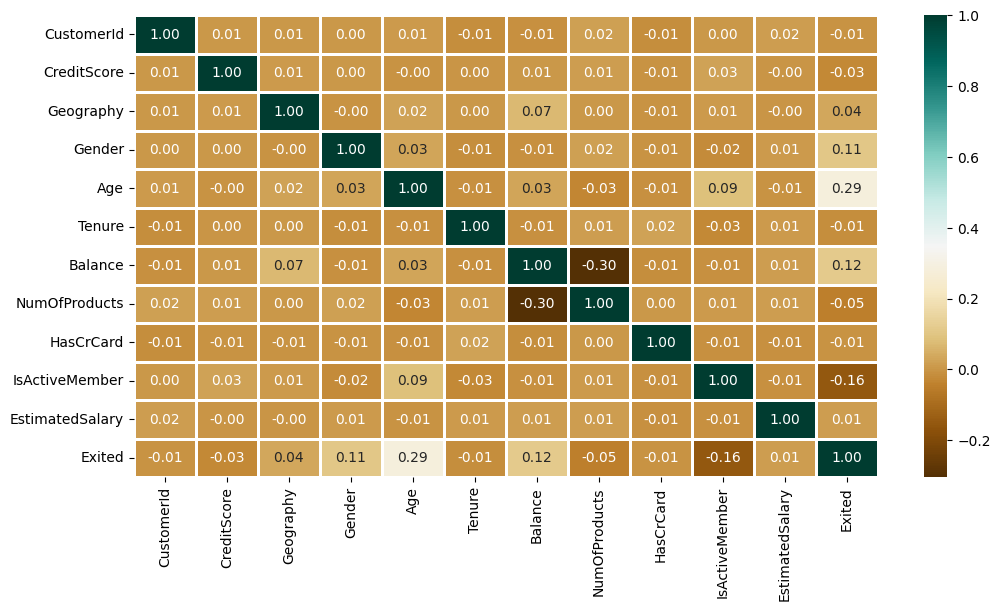

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

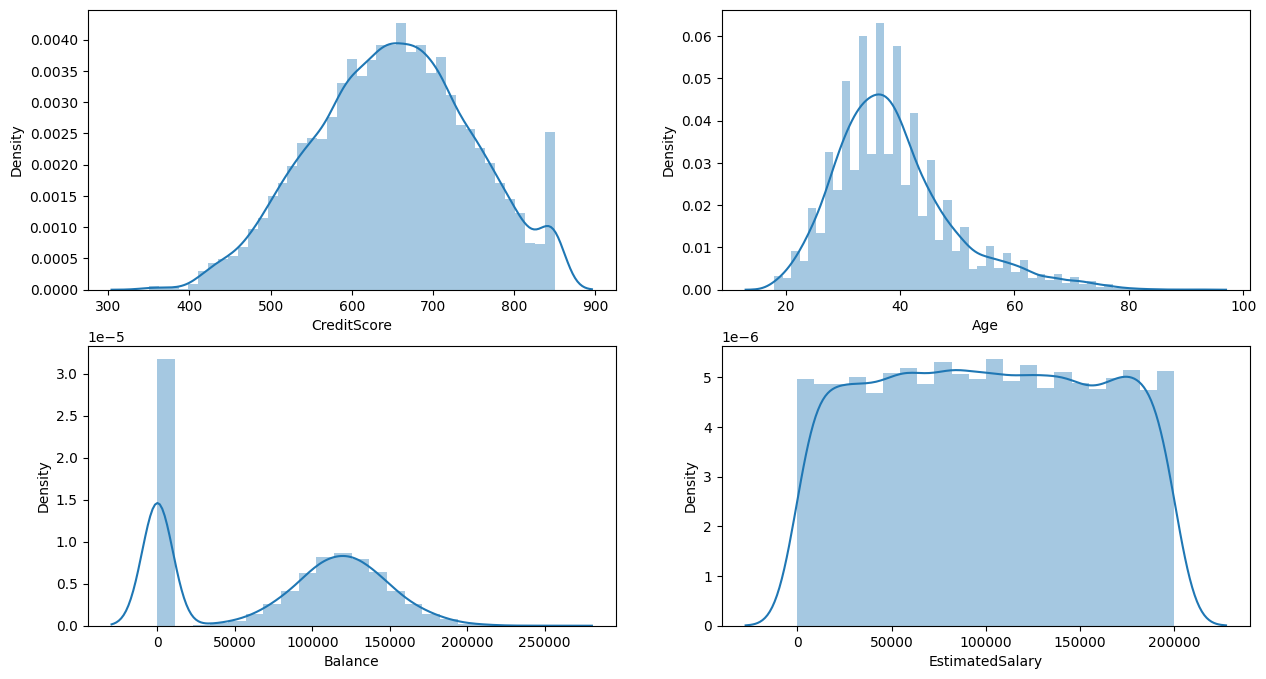

In [14]:
lis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.subplots(figsize=(15, 8))
index = 1
  
for i in lis:
    plt.subplot(2, 2, index)
    sns.distplot(df[i])
    index += 1

## Splitting Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.iloc[:,:11].values
y = df.iloc[:,11:12].values

In [17]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=4)

In [18]:
X_train.shape

(8000, 11)

## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Training and Evaluation

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

  
from sklearn import metrics
  
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()
  
# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy score of ",clf.__class__.__name__,"=",
          100*metrics.accuracy_score(y_test, y_pred))
    print("Classification report of", clf.__class__.__name__, ":\n", classification_report(y_test, y_pred))

Accuracy score of  RandomForestClassifier = 85.55
Classification report of RandomForestClassifier :
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1604
           1       0.69      0.49      0.58       396

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.86      0.85      2000

Accuracy score of  KNeighborsClassifier = 83.2
Classification report of KNeighborsClassifier :
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1604
           1       0.61      0.42      0.50       396

    accuracy                           0.83      2000
   macro avg       0.74      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000

Accuracy score of  SVC = 86.3
Classification report of SVC :
               precision    recall  f1-score   support

           0       0.87      0.9

Accuracy score of  RandomForestClassifier = 85.55


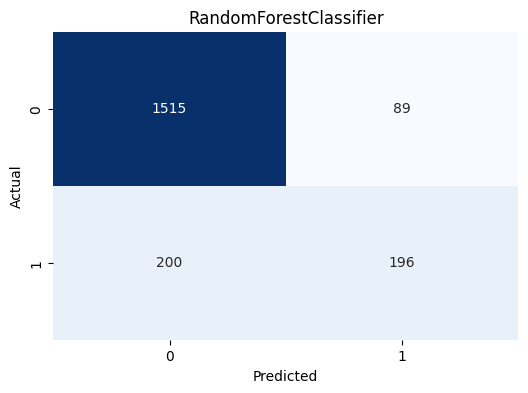

Accuracy score of  KNeighborsClassifier = 83.2


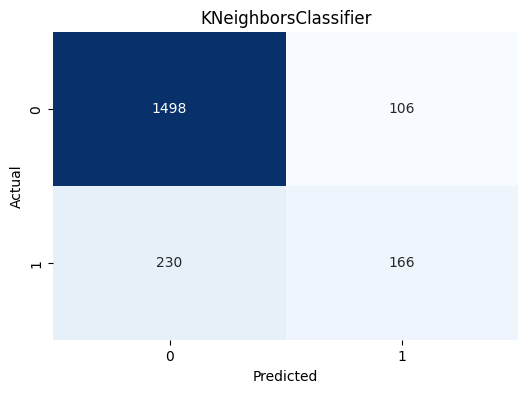

Accuracy score of  SVC = 86.3


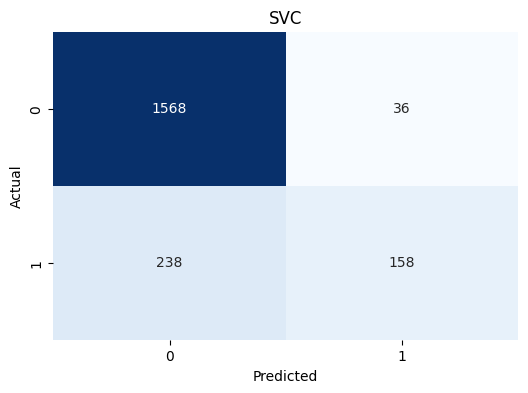

Accuracy score of  LogisticRegression = 81.39999999999999


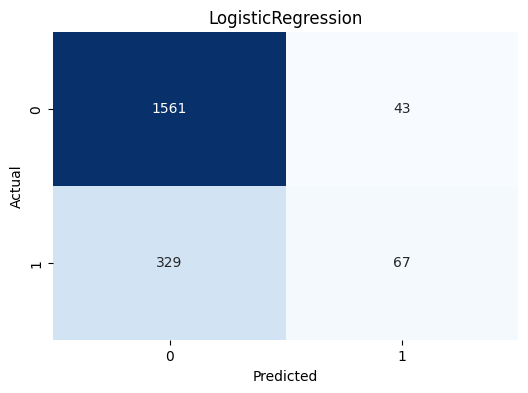

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(y_test, y_pred))

    # Create confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using Matplotlib and Seaborn
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(clf.__class__.__name__)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Dense

2023-11-23 23:56:32.360953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=11))
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

2023-11-23 23:56:34.025766: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-23 23:56:34.131830: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-23 23:56:34.131937: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-23 23:56:34.131967: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1990] Ignoring visible gpu device (device: 0, name: Radeon RX 560 Series, pci bus id: 0000:01:00.0) with AMDGPU version : gfx803. The supported AMDGPU versions are gfx1030, gfx900, gfx906, gfx908, gfx90a.
2023-11-23 23:56:

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-11-23 23:56:34.225737: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:34.227258: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [27]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


2023-11-23 23:56:34.250495: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:34.252367: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:34.262076: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:34.264015: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:34.277561: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:34.280198: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:34.282413: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:34.283998: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:34.292895: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:34

 87/200 [============>.................] - ETA: 0s - loss: 0.4871 - accuracy: 0.7956

2023-11-23 23:56:34.975541: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


181/200 [==========================>...] - ETA: 0s - loss: 0.4608 - accuracy: 0.8070

2023-11-23 23:56:35.329203: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35.330492: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35.331313: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35.339617: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35.341375: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35.351452: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35.352965: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35.353976: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35.354945: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35

200/200 [==============================] - 1s 3ms/step - loss: 0.4556 - accuracy: 0.8108 - val_loss: 0.4488 - val_accuracy: 0.8112
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8383 - val_loss: 0.4148 - val_accuracy: 0.8256
Epoch 3/100
 68/200 [=========>....................] - ETA: 0s - loss: 0.3697 - accuracy: 0.8502

2023-11-23 23:56:35.863187: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35.868554: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:35.873901: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8483 - val_loss: 0.3986 - val_accuracy: 0.8350
Epoch 4/100
 70/200 [=========>....................] - ETA: 0s - loss: 0.3608 - accuracy: 0.8576

2023-11-23 23:56:36.246494: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:36.251698: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:36.256438: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8537 - val_loss: 0.3917 - val_accuracy: 0.8356
Epoch 5/100
 63/200 [========>.....................] - ETA: 0s - loss: 0.3730 - accuracy: 0.8507

2023-11-23 23:56:36.587103: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:36.591734: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:36.596239: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8556 - val_loss: 0.3984 - val_accuracy: 0.8363
Epoch 6/100
 70/200 [=========>....................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8549

2023-11-23 23:56:36.948022: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:36.952970: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:36.957545: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8569 - val_loss: 0.3886 - val_accuracy: 0.8388
Epoch 7/100
 71/200 [=========>....................] - ETA: 0s - loss: 0.3459 - accuracy: 0.8534

2023-11-23 23:56:37.312859: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:37.318046: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:37.322789: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8575 - val_loss: 0.3872 - val_accuracy: 0.8381
Epoch 8/100
 64/200 [========>.....................] - ETA: 0s - loss: 0.3084 - accuracy: 0.8755

2023-11-23 23:56:37.651814: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:37.657350: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:37.662589: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8589 - val_loss: 0.3852 - val_accuracy: 0.8413
Epoch 9/100
 72/200 [=========>....................] - ETA: 0s - loss: 0.3205 - accuracy: 0.8668

2023-11-23 23:56:38.018104: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:38.023210: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:38.027927: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8589 - val_loss: 0.3888 - val_accuracy: 0.8425
Epoch 10/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.3372 - accuracy: 0.8629

2023-11-23 23:56:38.354384: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:38.359582: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:38.364399: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8627 - val_loss: 0.4040 - val_accuracy: 0.8369
Epoch 11/100
 72/200 [=========>....................] - ETA: 0s - loss: 0.3322 - accuracy: 0.8624

2023-11-23 23:56:38.686884: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:38.692887: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:38.697708: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8631 - val_loss: 0.3916 - val_accuracy: 0.8338
Epoch 12/100
 61/200 [========>.....................] - ETA: 0s - loss: 0.3285 - accuracy: 0.8663

2023-11-23 23:56:39.027426: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:39.032802: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:39.037953: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8634 - val_loss: 0.3872 - val_accuracy: 0.8381
Epoch 13/100
 66/200 [========>.....................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8688

2023-11-23 23:56:39.417543: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:39.424284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:39.429738: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8661 - val_loss: 0.3902 - val_accuracy: 0.8388
Epoch 14/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8647

2023-11-23 23:56:39.794660: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:39.799783: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:39.804455: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8655 - val_loss: 0.3884 - val_accuracy: 0.8369
Epoch 15/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8694

2023-11-23 23:56:40.155765: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:40.160873: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:40.165498: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8656 - val_loss: 0.3924 - val_accuracy: 0.8419
Epoch 16/100
 71/200 [=========>....................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8644

2023-11-23 23:56:40.495775: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:40.501524: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:40.508683: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8653 - val_loss: 0.4034 - val_accuracy: 0.8388
Epoch 17/100
 72/200 [=========>....................] - ETA: 0s - loss: 0.3248 - accuracy: 0.8628

2023-11-23 23:56:40.859031: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:40.864882: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:40.870862: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8662 - val_loss: 0.3976 - val_accuracy: 0.8363
Epoch 18/100
 64/200 [========>.....................] - ETA: 0s - loss: 0.3201 - accuracy: 0.8667

2023-11-23 23:56:41.208522: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:41.213933: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:41.219452: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8670 - val_loss: 0.3964 - val_accuracy: 0.8413
Epoch 19/100
 71/200 [=========>....................] - ETA: 0s - loss: 0.3165 - accuracy: 0.8658

2023-11-23 23:56:41.587783: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:41.593733: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:41.599307: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8706 - val_loss: 0.4066 - val_accuracy: 0.8431
Epoch 20/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.3011 - accuracy: 0.8792

2023-11-23 23:56:41.942514: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:41.947698: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:41.952778: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8705 - val_loss: 0.3994 - val_accuracy: 0.8431
Epoch 21/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2952 - accuracy: 0.8754

2023-11-23 23:56:42.277147: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:42.282819: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:42.287893: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8697 - val_loss: 0.3954 - val_accuracy: 0.8425
Epoch 22/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.3005 - accuracy: 0.8814

2023-11-23 23:56:42.625251: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:42.631519: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:42.636736: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8703 - val_loss: 0.4025 - val_accuracy: 0.8394
Epoch 23/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.3108 - accuracy: 0.8683

2023-11-23 23:56:42.971644: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:42.977265: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:42.982107: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8744 - val_loss: 0.3984 - val_accuracy: 0.8419
Epoch 24/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2955 - accuracy: 0.8763

2023-11-23 23:56:43.304355: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:43.310098: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:43.314935: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8750 - val_loss: 0.4308 - val_accuracy: 0.8425
Epoch 25/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.3050 - accuracy: 0.8677

2023-11-23 23:56:43.638548: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:43.644587: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:43.649837: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8742 - val_loss: 0.4112 - val_accuracy: 0.8344
Epoch 26/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8654

2023-11-23 23:56:43.974003: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:43.980133: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:43.985551: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8739 - val_loss: 0.4224 - val_accuracy: 0.8431
Epoch 27/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2891 - accuracy: 0.8771

2023-11-23 23:56:44.310739: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:44.316458: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:44.321401: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8777 - val_loss: 0.4095 - val_accuracy: 0.8350
Epoch 28/100
 72/200 [=========>....................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8754

2023-11-23 23:56:44.646657: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:44.652209: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:44.657042: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8773 - val_loss: 0.4087 - val_accuracy: 0.8363
Epoch 29/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8844

2023-11-23 23:56:44.980236: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:44.985753: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:44.990744: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8764 - val_loss: 0.4188 - val_accuracy: 0.8438
Epoch 30/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8898

2023-11-23 23:56:45.316024: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:45.321586: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:45.326453: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8798 - val_loss: 0.4299 - val_accuracy: 0.8350
Epoch 31/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2883 - accuracy: 0.8826

2023-11-23 23:56:45.651127: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:45.656463: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:45.661571: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8808 - val_loss: 0.4325 - val_accuracy: 0.8381
Epoch 32/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8848

2023-11-23 23:56:45.985581: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:45.992181: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:45.997526: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8788 - val_loss: 0.4157 - val_accuracy: 0.8344
Epoch 33/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2655 - accuracy: 0.8940

2023-11-23 23:56:46.322299: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:46.328872: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:46.334055: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.8839 - val_loss: 0.4260 - val_accuracy: 0.8269
Epoch 34/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8963

2023-11-23 23:56:46.657932: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:46.664109: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:46.669566: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.8811 - val_loss: 0.4138 - val_accuracy: 0.8288
Epoch 35/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8850

2023-11-23 23:56:46.994425: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:47.000704: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:47.006198: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.8834 - val_loss: 0.4171 - val_accuracy: 0.8344
Epoch 36/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.2780 - accuracy: 0.8800

2023-11-23 23:56:47.328437: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:47.334661: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:47.340201: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.8845 - val_loss: 0.4356 - val_accuracy: 0.8344
Epoch 37/100
 71/200 [=========>....................] - ETA: 0s - loss: 0.2765 - accuracy: 0.8895

2023-11-23 23:56:47.663166: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:47.669247: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:47.674356: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2745 - accuracy: 0.8863 - val_loss: 0.4370 - val_accuracy: 0.8350
Epoch 38/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2803 - accuracy: 0.8856

2023-11-23 23:56:48.000584: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:48.006443: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:48.011789: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.8873 - val_loss: 0.4267 - val_accuracy: 0.8325
Epoch 39/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8915

2023-11-23 23:56:48.335576: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:48.341169: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:48.346421: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.8870 - val_loss: 0.4304 - val_accuracy: 0.8288
Epoch 40/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8853

2023-11-23 23:56:48.673173: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:48.679120: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:48.684150: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.8883 - val_loss: 0.4498 - val_accuracy: 0.8344
Epoch 41/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.2585 - accuracy: 0.8917

2023-11-23 23:56:49.007533: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:49.012965: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:49.017990: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8902 - val_loss: 0.4475 - val_accuracy: 0.8325
Epoch 42/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2442 - accuracy: 0.8998

2023-11-23 23:56:49.340278: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:49.346399: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:49.352283: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8894 - val_loss: 0.4348 - val_accuracy: 0.8319
Epoch 43/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2485 - accuracy: 0.8940

2023-11-23 23:56:49.679357: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:49.684746: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:49.689834: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.8909 - val_loss: 0.4410 - val_accuracy: 0.8319
Epoch 44/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2496 - accuracy: 0.8917

2023-11-23 23:56:50.015066: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:50.020909: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:50.026339: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.8875 - val_loss: 0.4373 - val_accuracy: 0.8319
Epoch 45/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.2536 - accuracy: 0.9029

2023-11-23 23:56:50.354298: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:50.359776: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:50.364939: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.8944 - val_loss: 0.4479 - val_accuracy: 0.8263
Epoch 46/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2620 - accuracy: 0.8889

2023-11-23 23:56:50.688989: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:50.694435: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:50.699426: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.8928 - val_loss: 0.4488 - val_accuracy: 0.8338
Epoch 47/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2562 - accuracy: 0.8964

2023-11-23 23:56:51.026288: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:51.032270: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:51.037810: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.8973 - val_loss: 0.4710 - val_accuracy: 0.8181
Epoch 48/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2419 - accuracy: 0.9003

2023-11-23 23:56:51.365559: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:51.371017: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:51.376528: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8950 - val_loss: 0.4667 - val_accuracy: 0.8350
Epoch 49/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8946

2023-11-23 23:56:51.699389: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:51.706158: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:51.711765: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.8950 - val_loss: 0.4668 - val_accuracy: 0.8288
Epoch 50/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.2369 - accuracy: 0.9004

2023-11-23 23:56:52.036430: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:52.042659: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:52.047855: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8911 - val_loss: 0.4780 - val_accuracy: 0.8331
Epoch 51/100
 72/200 [=========>....................] - ETA: 0s - loss: 0.2381 - accuracy: 0.9010

2023-11-23 23:56:52.376079: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:52.381951: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:52.387138: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.8998 - val_loss: 0.4723 - val_accuracy: 0.8281
Epoch 52/100
 71/200 [=========>....................] - ETA: 0s - loss: 0.2285 - accuracy: 0.9049

2023-11-23 23:56:52.712989: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:52.718884: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:52.724425: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8953 - val_loss: 0.4841 - val_accuracy: 0.8269
Epoch 53/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2334 - accuracy: 0.8999

2023-11-23 23:56:53.053566: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:53.059526: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:53.065175: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.8970 - val_loss: 0.4615 - val_accuracy: 0.8256
Epoch 54/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.2239 - accuracy: 0.9021

2023-11-23 23:56:53.388199: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:53.394333: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:53.399518: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.8997 - val_loss: 0.4817 - val_accuracy: 0.8338
Epoch 55/100
 72/200 [=========>....................] - ETA: 0s - loss: 0.2122 - accuracy: 0.9084

2023-11-23 23:56:53.723630: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:53.729611: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:53.735205: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.8972 - val_loss: 0.4914 - val_accuracy: 0.8344
Epoch 56/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2397 - accuracy: 0.8999

2023-11-23 23:56:54.066730: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:54.072212: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:54.077542: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9000 - val_loss: 0.5330 - val_accuracy: 0.8256
Epoch 57/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2156 - accuracy: 0.9079

2023-11-23 23:56:54.403745: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:54.410284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:54.415983: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9048 - val_loss: 0.4940 - val_accuracy: 0.8325
Epoch 58/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2107 - accuracy: 0.9168

2023-11-23 23:56:54.739343: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:54.745080: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:54.750177: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2282 - accuracy: 0.9030 - val_loss: 0.5144 - val_accuracy: 0.8250
Epoch 59/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2085 - accuracy: 0.9058

2023-11-23 23:56:55.073504: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:55.079046: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:55.084150: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.9027 - val_loss: 0.4972 - val_accuracy: 0.8244
Epoch 60/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2275 - accuracy: 0.8960

2023-11-23 23:56:55.411201: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:55.416815: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:55.422417: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9017 - val_loss: 0.5051 - val_accuracy: 0.8225
Epoch 61/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2115 - accuracy: 0.9114

2023-11-23 23:56:55.749413: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:55.755005: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:55.760134: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9067 - val_loss: 0.5123 - val_accuracy: 0.8125
Epoch 62/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2148 - accuracy: 0.9080

2023-11-23 23:56:56.087377: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:56.092917: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:56.097989: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9047 - val_loss: 0.5167 - val_accuracy: 0.8144
Epoch 63/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2057 - accuracy: 0.9134

2023-11-23 23:56:56.429414: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:56.434969: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:56.440190: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9069 - val_loss: 0.5096 - val_accuracy: 0.8250
Epoch 64/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2015 - accuracy: 0.9140

2023-11-23 23:56:56.764794: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:56.770818: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:56.776297: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9105 - val_loss: 0.5292 - val_accuracy: 0.8281
Epoch 65/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2043 - accuracy: 0.9084

2023-11-23 23:56:57.101065: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:57.107353: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:57.112936: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9080 - val_loss: 0.5285 - val_accuracy: 0.8200
Epoch 66/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2014 - accuracy: 0.9062

2023-11-23 23:56:57.437221: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:57.443531: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:57.448757: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9075 - val_loss: 0.5284 - val_accuracy: 0.8213
Epoch 67/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.1992 - accuracy: 0.9134

2023-11-23 23:56:57.772504: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:57.778668: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:57.783890: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9112 - val_loss: 0.5332 - val_accuracy: 0.8306
Epoch 68/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.1996 - accuracy: 0.9185

2023-11-23 23:56:58.109121: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:58.114714: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:58.119977: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9117 - val_loss: 0.5296 - val_accuracy: 0.8213
Epoch 69/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.1967 - accuracy: 0.9181

2023-11-23 23:56:58.445332: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:58.450913: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:58.456176: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9139 - val_loss: 0.5633 - val_accuracy: 0.8188
Epoch 70/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.2033 - accuracy: 0.9126

2023-11-23 23:56:58.781405: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:58.787378: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:58.793511: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9117 - val_loss: 0.5434 - val_accuracy: 0.8213
Epoch 71/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.1807 - accuracy: 0.9229

2023-11-23 23:56:59.119748: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:59.125667: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:59.131167: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9152 - val_loss: 0.5498 - val_accuracy: 0.8125
Epoch 72/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.1889 - accuracy: 0.9174

2023-11-23 23:56:59.459674: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:59.465314: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:59.470483: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9150 - val_loss: 0.5564 - val_accuracy: 0.8194
Epoch 73/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1771 - accuracy: 0.9233

2023-11-23 23:56:59.795203: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:59.801234: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:56:59.806865: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9134 - val_loss: 0.5607 - val_accuracy: 0.8163
Epoch 74/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1962 - accuracy: 0.9162

2023-11-23 23:57:00.134283: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:00.139858: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:00.145591: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9175 - val_loss: 0.5784 - val_accuracy: 0.8213
Epoch 75/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.1826 - accuracy: 0.9265

2023-11-23 23:57:00.466591: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:00.473370: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:00.479295: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9219 - val_loss: 0.5756 - val_accuracy: 0.8144
Epoch 76/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1797 - accuracy: 0.9208

2023-11-23 23:57:00.803683: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:00.809653: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:00.815820: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9162 - val_loss: 0.5910 - val_accuracy: 0.8213
Epoch 77/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.2105 - accuracy: 0.9148

2023-11-23 23:57:01.140488: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:01.146523: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:01.152097: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9209 - val_loss: 0.5752 - val_accuracy: 0.8188
Epoch 78/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.1824 - accuracy: 0.9229

2023-11-23 23:57:01.479982: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:01.485605: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:01.491132: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9227 - val_loss: 0.5798 - val_accuracy: 0.8194
Epoch 79/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1764 - accuracy: 0.9246

2023-11-23 23:57:01.815290: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:01.820869: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:01.825991: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9228 - val_loss: 0.6229 - val_accuracy: 0.8238
Epoch 80/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.1723 - accuracy: 0.9278

2023-11-23 23:57:02.149742: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:02.155734: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:02.161383: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9214 - val_loss: 0.5818 - val_accuracy: 0.8175
Epoch 81/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1796 - accuracy: 0.9221

2023-11-23 23:57:02.486999: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:02.492613: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:02.497719: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1837 - accuracy: 0.9197 - val_loss: 0.5987 - val_accuracy: 0.8150
Epoch 82/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1572 - accuracy: 0.9350

2023-11-23 23:57:02.824912: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:02.830512: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:02.836161: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.9247 - val_loss: 0.5823 - val_accuracy: 0.8087
Epoch 83/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1722 - accuracy: 0.9308

2023-11-23 23:57:03.157446: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:03.163584: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:03.169347: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9247 - val_loss: 0.6196 - val_accuracy: 0.8131
Epoch 84/100
 76/200 [==========>...................] - ETA: 0s - loss: 0.1793 - accuracy: 0.9268

2023-11-23 23:57:03.493615: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:03.500031: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:03.505781: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9262 - val_loss: 0.6145 - val_accuracy: 0.8206
Epoch 85/100
 76/200 [==========>...................] - ETA: 0s - loss: 0.1627 - accuracy: 0.9379

2023-11-23 23:57:03.827095: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:03.833431: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:03.839357: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9264 - val_loss: 0.6022 - val_accuracy: 0.8163
Epoch 86/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.1677 - accuracy: 0.9269

2023-11-23 23:57:04.162041: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:04.168524: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:04.174192: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9259 - val_loss: 0.6196 - val_accuracy: 0.8156
Epoch 87/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1535 - accuracy: 0.9396

2023-11-23 23:57:04.498521: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:04.504483: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:04.509692: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9287 - val_loss: 0.6814 - val_accuracy: 0.8213
Epoch 88/100
 76/200 [==========>...................] - ETA: 0s - loss: 0.1581 - accuracy: 0.9326

2023-11-23 23:57:04.831305: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:04.837102: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:04.842273: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9287 - val_loss: 0.6471 - val_accuracy: 0.8119
Epoch 89/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1637 - accuracy: 0.9321

2023-11-23 23:57:05.164766: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:05.170734: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:05.175911: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9309 - val_loss: 0.6349 - val_accuracy: 0.8094
Epoch 90/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.1676 - accuracy: 0.9269

2023-11-23 23:57:05.498545: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:05.504478: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:05.509673: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9308 - val_loss: 0.6703 - val_accuracy: 0.8144
Epoch 91/100
 66/200 [========>.....................] - ETA: 0s - loss: 0.1582 - accuracy: 0.9309

2023-11-23 23:57:05.831849: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:05.837812: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:05.843113: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9319 - val_loss: 0.6687 - val_accuracy: 0.8194
Epoch 92/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.1572 - accuracy: 0.9345

2023-11-23 23:57:06.190284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:06.196365: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:06.202138: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9305 - val_loss: 0.6675 - val_accuracy: 0.8169
Epoch 93/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1534 - accuracy: 0.9379

2023-11-23 23:57:06.526670: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:06.532218: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:06.537382: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9348 - val_loss: 0.6549 - val_accuracy: 0.8156
Epoch 94/100
 73/200 [=========>....................] - ETA: 0s - loss: 0.1556 - accuracy: 0.9401

2023-11-23 23:57:06.860692: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:06.867029: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:06.872702: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9339 - val_loss: 0.7123 - val_accuracy: 0.8100
Epoch 95/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1467 - accuracy: 0.9354

2023-11-23 23:57:07.194938: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:07.200722: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:07.205884: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9336 - val_loss: 0.6817 - val_accuracy: 0.8175
Epoch 96/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.1435 - accuracy: 0.9371

2023-11-23 23:57:07.527777: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:07.533293: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:07.538794: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9370 - val_loss: 0.6906 - val_accuracy: 0.8144
Epoch 97/100
 74/200 [==========>...................] - ETA: 0s - loss: 0.1433 - accuracy: 0.9400

2023-11-23 23:57:07.861203: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:07.867625: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:07.873545: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9370 - val_loss: 0.6977 - val_accuracy: 0.8138
Epoch 98/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1409 - accuracy: 0.9433

2023-11-23 23:57:08.213289: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:08.219336: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:08.224761: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.9386 - val_loss: 0.6977 - val_accuracy: 0.8119
Epoch 99/100
 72/200 [=========>....................] - ETA: 0s - loss: 0.1481 - accuracy: 0.9388

2023-11-23 23:57:08.549259: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:08.556560: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:08.562281: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9370 - val_loss: 0.7085 - val_accuracy: 0.8125
Epoch 100/100
 75/200 [==========>...................] - ETA: 0s - loss: 0.1500 - accuracy: 0.9400

2023-11-23 23:57:08.889468: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:08.895266: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:08.900483: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


200/200 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9408 - val_loss: 0.6932 - val_accuracy: 0.8169


2023-11-23 23:57:09.225889: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:09.231899: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:09.237568: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [29]:
y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

63/63 [==============================] - 0s 913us/step


2023-11-23 23:57:20.630113: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:20.632095: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:20.652931: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:20.655466: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:20.656807: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:20.658820: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:20.667612: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:20.669194: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:20.670605: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-23 23:57:20

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.838

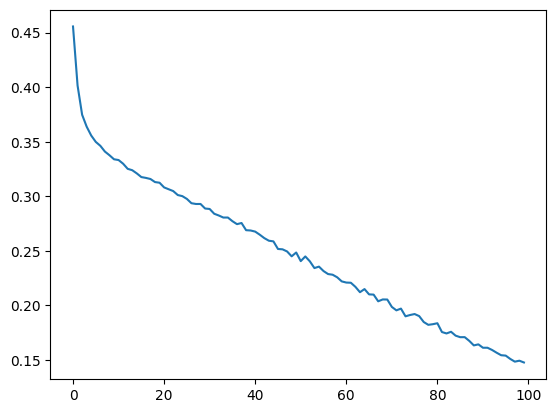

In [31]:
plt.plot(history.history['loss'])

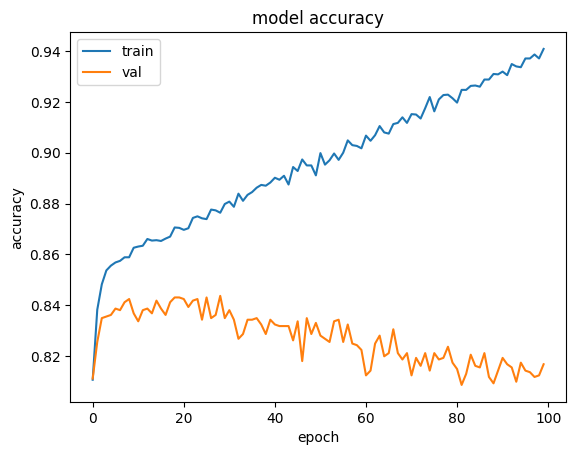

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

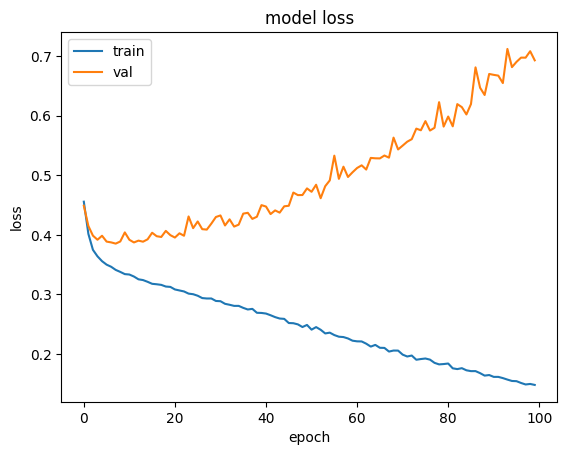

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()